In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [137]:
data = pd.read_csv("signal2.csv")
data = pd.DataFrame(data)
X = data.time
Y = data.value

In [139]:
window_size = 3
#Pour chaque fenetre de taille 3, on calcule le max, le min, la valeur crête-crête, l'energie, mediane
features_list = []
for i in range(0, len(data) - window_size):
    window = Y.iloc[i:i+window_size].values
    feat = {
        "max": np.max(window),
        "min": np.min(window),
        "crete-crete": np.ptp(window),
        "energie": np.sum(window**2),
        "mediane": window[len(window)//2]
    }

    
    features_list.append(feat)

features_df = pd.DataFrame(features_list)

In [ ]:
#le choix de la contamination se fait en fonction de la visualisation du signal
model = IsolationForest(contamination=0.2, random_state=42)
model.fit(features_df)
predictions = model.predict(features_df)
anomaly_idx = np.where(predictions == -1)[0] #car tuple

pic_positions = []

for idx in anomaly_idx:
    if len(pic_positions) == 0:
        pic_positions.append(idx)
    elif idx - pic_positions[-1] > 1:
        pic_positions.append(idx)

print("Position des pics", [int(x) for x in pic_positions])



Position des pics [17, 22, 27, 58, 68, 78, 109, 113, 119, 124, 126, 133, 145, 147, 150, 152, 155, 160, 182, 184, 193, 195, 206, 209, 211, 221, 223, 233, 235, 242, 252, 268, 280, 282, 287, 297, 299, 301, 303, 305, 310, 312, 316, 318, 328, 339, 349, 354, 359, 361, 368, 389, 396, 398, 410, 430, 432, 434, 441, 445, 447, 449, 451, 459, 461, 468, 470, 477, 494, 496, 499, 501]


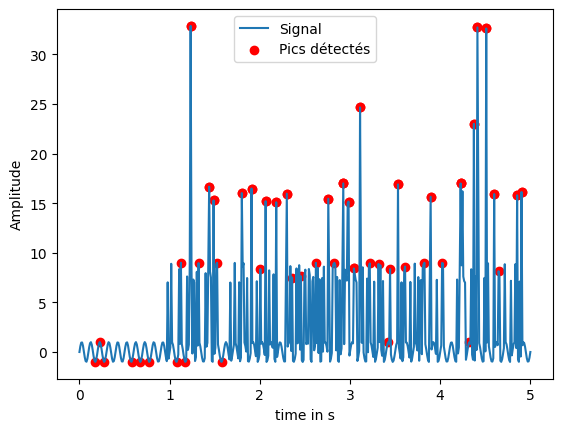

In [ ]:
corrected_pics = []

for p in pic_positions:
    zone =  [p-2,p-1,p,p+1,p+2]
    max_idx = max(zone, key=lambda i: abs(Y[i]))
    corrected_pics.append(max_idx)
pic_positions = corrected_pics


plt.figure()


plt.plot(X, Y, label="Signal")

plt.scatter(
    X[pic_positions],
    Y[pic_positions],
    color='red',
    label="Pics détectés"
)

plt.xlabel("time in s")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
